In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('training_set.csv')
val_df = pd.read_csv('validation_set.csv')

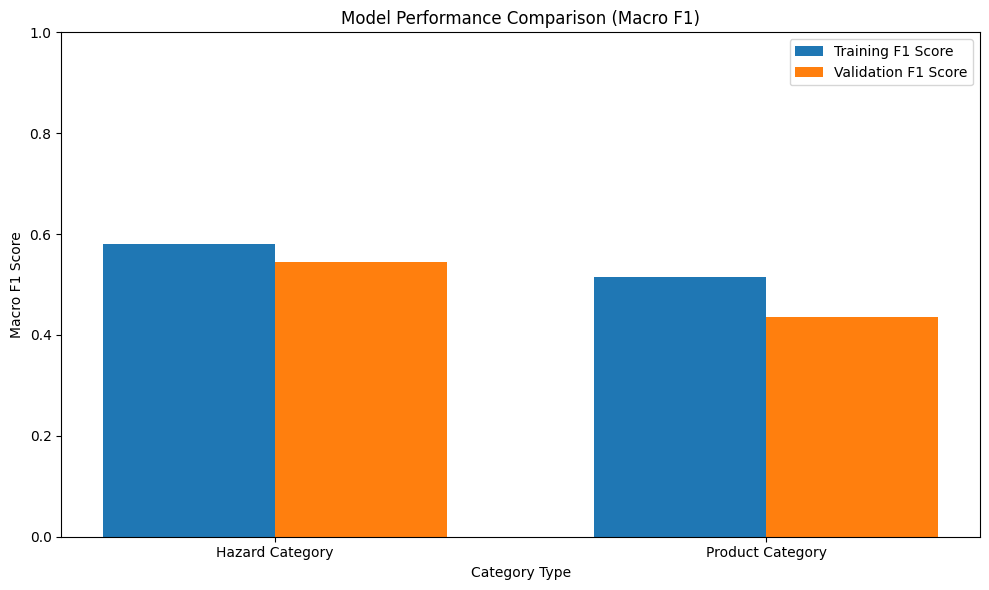

0.54561322130335


In [22]:
# Import necessary libraries
from sklearn.metrics import f1_score

# TF-IDF Vectorization of the text data
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_df['text'])
X_val = tfidf.transform(val_df['text'])

# Function to train model and evaluate performance using F1 Score
def train_and_evaluate(target_column):
    # Encode labels
    le = LabelEncoder()
    y_train = le.fit_transform(train_df[target_column])
    y_val = le.transform(val_df[target_column])
    
    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate F1 scores with macro average
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    
    return train_f1, val_f1

# Get F1 scores for both target columns
hazard_train_f1, hazard_val_f1 = train_and_evaluate('hazard-category')
product_train_f1, product_val_f1 = train_and_evaluate('product-category')

# Plotting the results
categories = ['Hazard Category', 'Product Category']
train_f1_scores = [hazard_train_f1, product_train_f1]
val_f1_scores = [hazard_val_f1, product_val_f1]

bar_width = 0.35
index = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(index, train_f1_scores, bar_width, label='Training F1 Score')
plt.bar([i + bar_width for i in index], val_f1_scores, bar_width, label='Validation F1 Score')

plt.xlabel('Category Type')
plt.ylabel('Macro F1 Score')
plt.title('Model Performance Comparison (Macro F1)')
plt.xticks([i + bar_width/2 for i in index], categories)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
print(hazard_val_f1)

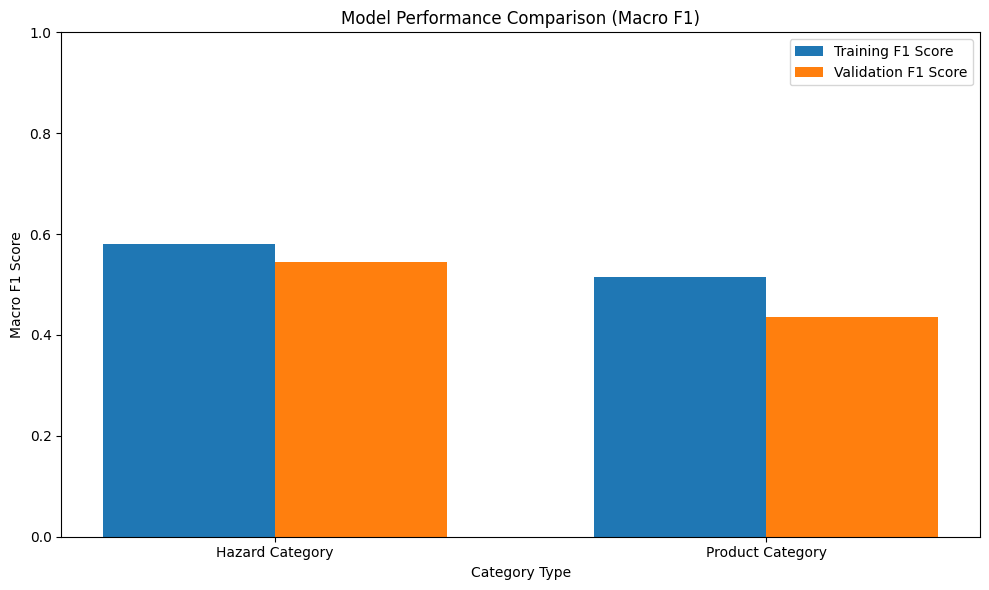

0.54561322130335


In [ ]:
# Import necessary libraries
from sklearn.metrics import f1_score

# TF-IDF Vectorization of the text data
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_df['text'])
X_val = tfidf.transform(val_df['text'])

# Function to train model and evaluate performance using F1 Score
def train_and_evaluate(target_column):
    # Encode labels
    le = LabelEncoder()
    y_train = le.fit_transform(train_df[target_column])
    y_val = le.transform(val_df[target_column])
    
    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate F1 scores with macro average
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    
    return train_f1, val_f1

# Get F1 scores for both target columns
hazard_train_f1, hazard_val_f1 = train_and_evaluate('hazard-category')
product_train_f1, product_val_f1 = train_and_evaluate('product-category')

# Plotting the results
categories = ['Hazard Category', 'Product Category']
train_f1_scores = [hazard_train_f1, product_train_f1]
val_f1_scores = [hazard_val_f1, product_val_f1]

bar_width = 0.35
index = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(index, train_f1_scores, bar_width, label='Training F1 Score')
plt.bar([i + bar_width for i in index], val_f1_scores, bar_width, label='Validation F1 Score')

plt.xlabel('Category Type')
plt.ylabel('Macro F1 Score')
plt.title('Model Performance Comparison (Macro F1)')
plt.xticks([i + bar_width/2 for i in index], categories)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
print(hazard_val_f1)

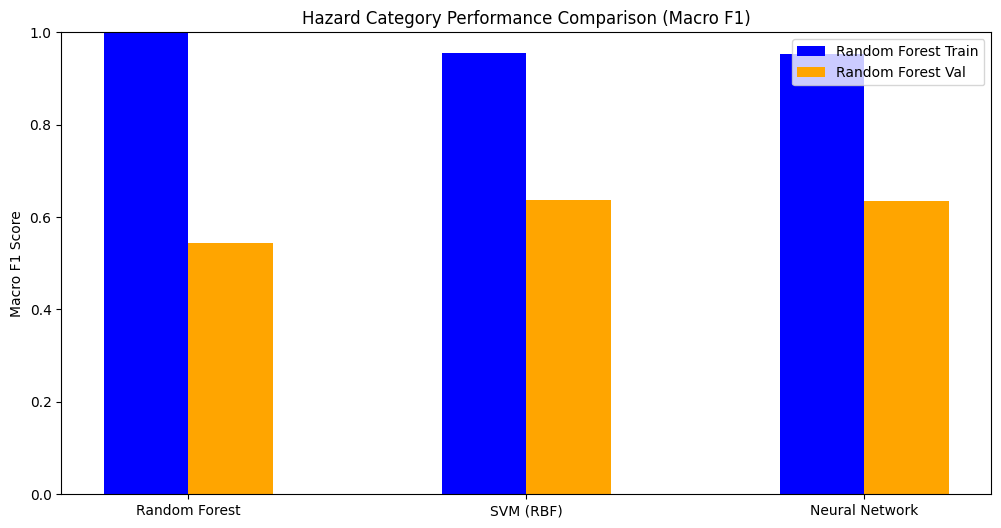

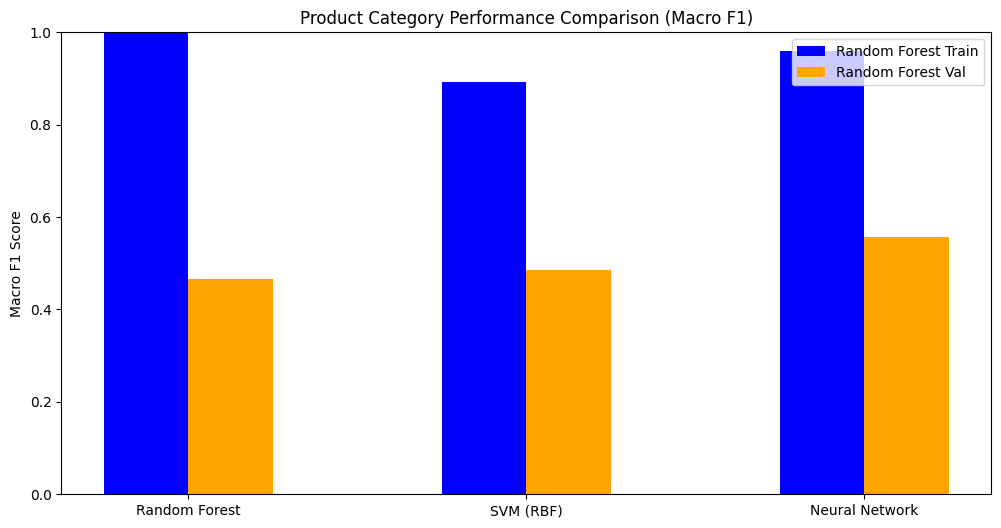

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score  # Added import for F1 score
import numpy as np

# Enhanced TF-IDF with n-grams
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X_train = tfidf.fit_transform(train_df['text'])
X_val = tfidf.transform(val_df['text'])

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    # Get predictions for both sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    # Calculate F1 scores
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    return train_f1, val_f1

def process_target(target_column):
    le = LabelEncoder()
    y_train = le.fit_transform(train_df[target_column])
    y_val = le.transform(val_df[target_column])
    
    # Initialize models with class balancing
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', class_weight='balanced', random_state=42),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(512,), early_stopping=True, random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        train_f1, val_f1 = evaluate_model(model, X_train, y_train, X_val, y_val)
        results[name] = (train_f1, val_f1)
    
    return results

# Get results for both targets
hazard_results = process_target('hazard-category')
product_results = process_target('product-category')

# Visualization
def plot_comparison(results, title):
    plt.figure(figsize=(12, 6))
    bar_width = 0.25
    index = np.arange(len(results))
    
    for i, (model, (train_f1, val_f1)) in enumerate(results.items()):
        plt.bar(i - bar_width/2, train_f1, bar_width, label=f'{model} Train' if i==0 else "", color='blue')
        plt.bar(i + bar_width/2, val_f1, bar_width, label=f'{model} Val' if i==0 else "", color='orange')
    
    plt.title(title)
    plt.ylabel('Macro F1 Score')  # Updated label
    plt.xticks(index, results.keys())
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

plot_comparison(hazard_results, 'Hazard Category Performance Comparison (Macro F1)')  # Updated title
plot_comparison(product_results, 'Product Category Performance Comparison (Macro F1)')  # Updated title

In [27]:
# Print numerical results for both categories
def print_results(results, category_name):
    print(f"Results for {category_name}:")
    for model, (train_f1, val_f1) in results.items():
        print(f"{model}: Train Accuracy = {train_f1:.4f}, Validation Accuracy = {val_f1:.4f}")
    print()

# Print hazard and product category results
print_results(hazard_results, 'Hazard Category')
print_results(product_results, 'Product Category')


Results for Hazard Category:
Random Forest: Train Accuracy = 0.9995, Validation Accuracy = 0.5437
SVM (RBF): Train Accuracy = 0.9542, Validation Accuracy = 0.6367
Neural Network: Train Accuracy = 0.9530, Validation Accuracy = 0.6345

Results for Product Category:
Random Forest: Train Accuracy = 0.9988, Validation Accuracy = 0.4654
SVM (RBF): Train Accuracy = 0.8933, Validation Accuracy = 0.4863
Neural Network: Train Accuracy = 0.9584, Validation Accuracy = 0.5574



Same as above but only for hazard category. Number 1 performer